## Model Training 

### Loading the necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/149.9 MB 7.2 MB/s eta 0:00:21
    --------------------------------------- 2.6/149.9 MB 6.9 MB/s eta 0:00:22
   - -------------------------------------- 4.5/149.9 MB 7.3 MB/s eta 0:00:21
   - -------------------------------------- 6.6/149.9 MB 8.2 MB/s eta 0:00:18
   -- ------------------------------------- 8.4/149.9 MB 8.3 MB/s eta 0:00:18
   -- ------------------------------------- 10.5/149.9 MB 8.5 MB/s eta 0:00:17
   --- ------------------------------------ 12.6/149.9 MB 8.8 MB/s eta 0:00:16
   --- ------------------------------------ 14.2/149.9 MB 8.5 MB/s eta 0:00:16
   ---- ----------------------------------- 16.0/149.9 MB 8.7 MB/s eta 0:00:16
   ---- ----------------------------------- 16.3/149.9 MB 8.3 MB/s eta 0:00:17
   ---- ----------------------------------- 16.5/149.9 MB 7.5 MB/s eta 0:00:18
   ---- ----------------------------------- 17.8/149.9 MB 7.2 MB/

In [5]:
!pip install catboost

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl (102.4 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 7.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.6 MB 7.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.1 MB/s eta 0:00:00


In [21]:
df = pd.read_csv('diabetic-patients-readmission-prediction/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Dropping the Insignificant Columns

In [22]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
df.drop(labels=['encounter_id', 'patient_nbr', 'race', 'gender', 'weight', 'payer_code', 'medical_specialty',
               'max_glu_serum', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
                'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                'metformin-pioglitazone'], axis=1, inplace=True)

### Getting X and Y varibales

In [25]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [26]:
X.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,repaglinide,glipizide,insulin,change,diabetesMed
0,[0-10),6,25,1,1,41,0,1,0,0,...,?,?,1,NaN,No,No,No,No,No,No
1,[10-20),1,1,7,3,59,0,18,0,0,...,250.01,255,9,NaN,No,No,No,Up,Ch,Yes
2,[20-30),1,1,7,2,11,5,13,2,0,...,250,V27,6,NaN,No,No,Steady,No,No,Yes
3,[30-40),1,1,7,2,44,1,16,0,0,...,250.43,403,7,NaN,No,No,No,Up,Ch,Yes
4,[40-50),1,1,7,1,51,0,8,0,0,...,157,250,5,NaN,No,No,Steady,Steady,Ch,Yes


### Encoding the Y varibale

In [29]:
y.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [30]:
y = y.apply(lambda x: 1 if x > '>30' else 0)

In [31]:
y.value_counts()

readmitted
1    54864
0    46902
Name: count, dtype: int64

### Creating Pipeline with Column Transformer

In [32]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [67]:
print("Numerical fetaures: ",num_features)
print("Categorical features: ",cat_features)

Numerical fetaures:  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
Categorical features:  Index(['age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin',
       'repaglinide', 'glipizide', 'insulin', 'change', 'diabetesMed'],
      dtype='object')


In [71]:
#Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

#Categorical Pipeline
cat_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy='most_frequent')),
        ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore',sparse_output=True)),
    ]
)


preprocessor = ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,num_features),
        ('cat_pipeline',cat_pipeline,cat_features)        
    ],
    remainder='drop',
    sparse_threshold=0.3
)

### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Transforming the data with the pipeline created

In [73]:
print(x_train.shape)
print(x_test.shape)

(81412, 22)
(20354, 22)


In [74]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [75]:
print(x_train_transformed.shape)

(81412, 2213)


In [76]:
feature_names = preprocessor.get_feature_names_out()
print(len(feature_names))

2213


In [77]:
x_train_arr = x_train_transformed.toarray()
x_test_arr = x_test_transformed.toarray()

feature_names = preprocessor.get_feature_names_out()

In [78]:
X_train_df = pd.DataFrame(x_train_arr, columns=feature_names, index=x_train.index)
X_test_df = pd.DataFrame(x_test_arr, columns=feature_names, index=x_test.index)

In [79]:
X_train_df.head()

,num_pipeline__admission_type_id,num_pipeline__discharge_disposition_id,num_pipeline__admission_source_id,num_pipeline__time_in_hospital,num_pipeline__num_lab_procedures,num_pipeline__num_procedures,num_pipeline__num_medications,num_pipeline__number_outpatient,num_pipeline__number_emergency,num_pipeline__number_inpatient,...,cat_pipeline__glipizide_Steady,cat_pipeline__glipizide_Up,cat_pipeline__insulin_Down,cat_pipeline__insulin_No,cat_pipeline__insulin_Steady,cat_pipeline__insulin_Up,cat_pipeline__change_Ch,cat_pipeline__change_No,cat_pipeline__diabetesMed_No,cat_pipeline__diabetesMed_Yes
24079,-0.708108,-0.513659,0.306959,-0.134119,0.249395,-0.784879,-0.616845,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
98079,-0.708108,-0.513659,0.306959,-1.136220,-0.054612,-0.784879,-1.355826,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6237,-0.708108,-0.513659,0.306959,-0.134119,0.046724,-0.784879,-0.740008,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
72208,-0.708108,-0.135607,0.306959,-0.468152,0.553401,-0.784879,-0.986336,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
33075,-0.708108,1.376599,0.306959,2.204116,-0.409285,0.974798,0.861118,-0.291171,-0.214154,0.287305,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [80]:
X_test_df.head()

,num_pipeline__admission_type_id,num_pipeline__discharge_disposition_id,num_pipeline__admission_source_id,num_pipeline__time_in_hospital,num_pipeline__num_lab_procedures,num_pipeline__num_procedures,num_pipeline__num_medications,num_pipeline__number_outpatient,num_pipeline__number_emergency,num_pipeline__number_inpatient,...,cat_pipeline__glipizide_Steady,cat_pipeline__glipizide_Up,cat_pipeline__insulin_Down,cat_pipeline__insulin_No,cat_pipeline__insulin_Steady,cat_pipeline__insulin_Up,cat_pipeline__change_Ch,cat_pipeline__change_No,cat_pipeline__diabetesMed_No,cat_pipeline__diabetesMed_Yes
35956,-0.708108,-0.513659,0.060775,2.204116,1.262748,-0.784879,0.491627,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
60927,-0.708108,-0.513659,-1.170144,-1.136220,-1.169301,-0.784879,-1.109499,-0.291171,-0.214154,-0.502261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
79920,0.679574,0.431470,-1.170144,-0.134119,-1.118633,0.974798,0.861118,0.499806,-0.214154,1.076871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
50078,-0.014267,-0.513659,-1.170144,2.538150,-0.763959,-0.784879,0.368463,-0.291171,-0.214154,0.287305,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
44080,-0.708108,-0.324633,0.306959,-1.136220,-1.118633,-0.784879,-1.232663,-0.291171,-0.214154,-0.502261,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Create an Evaluate Function to give all metrics after model Training

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    report = classification_report(true, predicted)
    return acc,cm, precision, recall, f1, report
    

In [91]:
# Remove problematic characters from column names
X_train_df.columns = X_train_df.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test_df.columns = X_test_df.columns.str.replace(r"[\[\]<>]", "", regex=True)


In [95]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier":  KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth = 10, max_leaf_nodes=100),
    "Random Forest Regressor": RandomForestClassifier(),
    "XGBRegressor": XGBClassifier(), 
    "CatBoosting Regressor": CatBoostClassifier(verbose=False),
    "AdaBoost Regressor": AdaBoostClassifier()
}
model_list = []
acc_list =[]
f1_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_df, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Training Set Evaluation:")
    train_acc, train_cm, train_precision, train_recall, train_f1, train_report = evaluate_model(y_train, y_train_pred)
    print("Accuracy Score: ", train_acc)
    print("Precision Score: ", train_precision)
    print("Recall Score: ", train_recall)
    print("F1 Score: ", train_f1)

    print('----------------------------------')
    
    print("Test Set Evaluation:")
    test_acc, test_cm, test_precision, test_recall, test_f1, test_report = evaluate_model(y_test, y_test_pred)
    print("Accuracy Score: ", test_acc)
    print("Precision Score: ", test_precision)
    print("Recall Score: ", test_recall)
    print("F1 Score: ", test_f1)
    
    acc_list.append(test_acc)
    f1_list.append(test_f1)
    
    print("="*40, "\n")



C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Training Set Evaluation:
Accuracy Score:  0.6409865867439689
Precision Score:  0.6410033060519063
Recall Score:  0.6409865867439689
F1 Score:  0.6342986550026444
----------------------------------
Test Set Evaluation:
Accuracy Score:  0.6263142379876191
Precision Score:  0.6256102624826272
Recall Score:  0.6263142379876191
F1 Score:  0.619549769311173

K-Neighbors Classifier
Training Set Evaluation:
Accuracy Score:  0.7337370412224242
Precision Score:  0.7333629011514939
Recall Score:  0.7337370412224242
F1 Score:  0.7327433920359131
----------------------------------
Test Set Evaluation:
Accuracy Score:  0.586715141986833
Precision Score:  0.5848672158996575
Recall Score:  0.586715141986833
F1 Score:  0.5850397774211574

Decision Tree
Training Set Evaluation:
Accuracy Score:  0.6408391883260453
Precision Score:  0.6398065925420946
Recall Score:  0.6408391883260453
F1 Score:  0.6363090345054409
----------------------------------
Test Set Evaluation:
Accuracy Score: 

C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Regressor
Training Set Evaluation:
Accuracy Score:  0.6387264776691397
Precision Score:  0.6386684605816718
Recall Score:  0.6387264776691397
F1 Score:  0.631882987995859
----------------------------------
Test Set Evaluation:
Accuracy Score:  0.6345190134617275
Precision Score:  0.6345530114106699
Recall Score:  0.6345190134617275
F1 Score:  0.6274407421156144



#### From the above results I can see that Catboost is performing best among all. So my final model will be catboost

### Tuning the Catboost model

In [96]:
cat_model = CatBoostClassifier(verbose=0)

param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

grid_search = RandomizedSearchCV(cat_model, param_grid, n_iter=10, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_df, y_train)

best_cat = grid_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [99]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 4}
0.6982196382128415


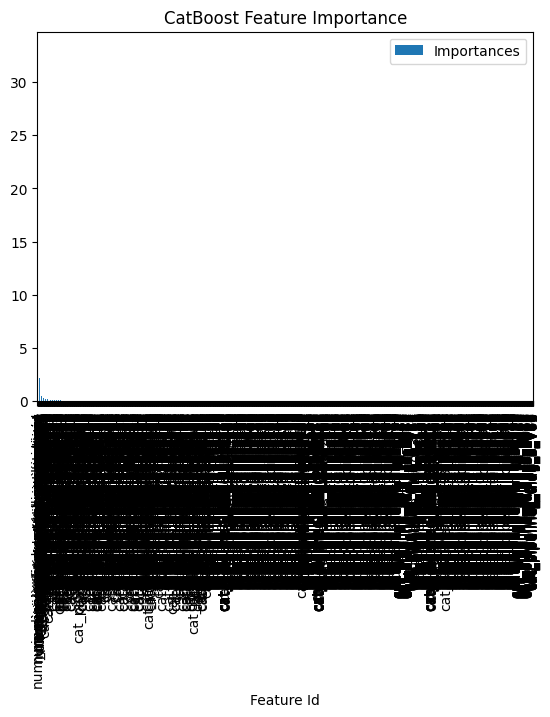

In [101]:
cat_model.fit(X_train_df, y_train)
importances = cat_model.get_feature_importance(prettified=True)
importances.plot(kind='bar', x='Feature Id', y='Importances')
plt.title("CatBoost Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cat_model, X_train_df, y_train, cv=5, scoring='f1')
print("F1 Score (CV Mean):", scores.mean())


In [102]:
new_cat = CatBoostClassifier(learning_rate= 0.05, l2_leaf_reg= 3, iterations= 200, depth= 4)
new_cat.fit(X_train_df, y_train)


0:	learn: 0.6894341	total: 35.1ms	remaining: 6.98s
1:	learn: 0.6854070	total: 66.2ms	remaining: 6.56s
2:	learn: 0.6825691	total: 95ms	remaining: 6.24s
3:	learn: 0.6797134	total: 123ms	remaining: 6.01s
4:	learn: 0.6763331	total: 150ms	remaining: 5.86s
5:	learn: 0.6739001	total: 177ms	remaining: 5.71s
6:	learn: 0.6712072	total: 272ms	remaining: 7.5s
7:	learn: 0.6691613	total: 302ms	remaining: 7.25s
8:	learn: 0.6674583	total: 356ms	remaining: 7.55s
9:	learn: 0.6656960	total: 452ms	remaining: 8.58s
10:	learn: 0.6643346	total: 486ms	remaining: 8.35s
11:	learn: 0.6623305	total: 519ms	remaining: 8.13s
12:	learn: 0.6609610	total: 547ms	remaining: 7.86s
13:	learn: 0.6597155	total: 574ms	remaining: 7.63s
14:	learn: 0.6585782	total: 600ms	remaining: 7.4s
15:	learn: 0.6575325	total: 627ms	remaining: 7.21s
16:	learn: 0.6565423	total: 681ms	remaining: 7.33s
17:	learn: 0.6557073	total: 755ms	remaining: 7.64s
18:	learn: 0.6548356	total: 784ms	remaining: 7.46s
19:	learn: 0.6541104	total: 812ms	remainin

<Axes: >

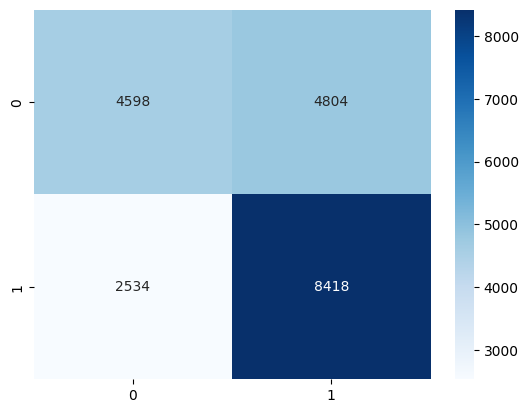

In [103]:
y_pred = new_cat.predict(X_test_df)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')